In [1]:
import pandas as pd

# Load CSV
csv_path = "../data/complaints.csv"
df = pd.read_csv(csv_path)

# Save as Parquet
parquet_path = "../data/raw_complaints.parquet"
df.to_parquet(parquet_path, index=False)

print(f"Saved Parquet file to: {parquet_path}")


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_34684\2307978999.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Saved Parquet file to: ../data/raw_complaints.parquet


In [28]:
parquet_path = "../data/raw_complaints.parquet"
df = pd.read_parquet(parquet_path)

# Check shape
print("Dataset shape:", df.shape)

# Now continue your EDA
df.head()


Dataset shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,Experian Information Solutions Inc.,FL,32092,None,None,Web,2025-06-20,In progress,Yes,None,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,None,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,None,None,Web,2025-06-20,Closed with explanation,Yes,None,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,Experian Information Solutions Inc.,AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,None,None,Experian Information Solutions Inc.,IL,60628,None,None,Web,2025-06-20,In progress,Yes,None,14195692


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from nltk.tokenize import word_tokenize

parquet_path = "../data/raw_complaints.parquet"
df = pd.read_parquet(parquet_path)

# Check shape
print("Dataset shape:", df.shape)

# Now continue your EDA
df.head()

Dataset shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,Experian Information Solutions Inc.,FL,32092,None,None,Web,2025-06-20,In progress,Yes,None,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,None,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,None,None,Web,2025-06-20,Closed with explanation,Yes,None,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,Experian Information Solutions Inc.,AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,None,None,Experian Information Solutions Inc.,IL,60628,None,None,Web,2025-06-20,In progress,Yes,None,14195692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 19 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
 18  has_narrative                 bool  
dtype

Analyze Distribution of Complaints Across Products

C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_34264\2747192946.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


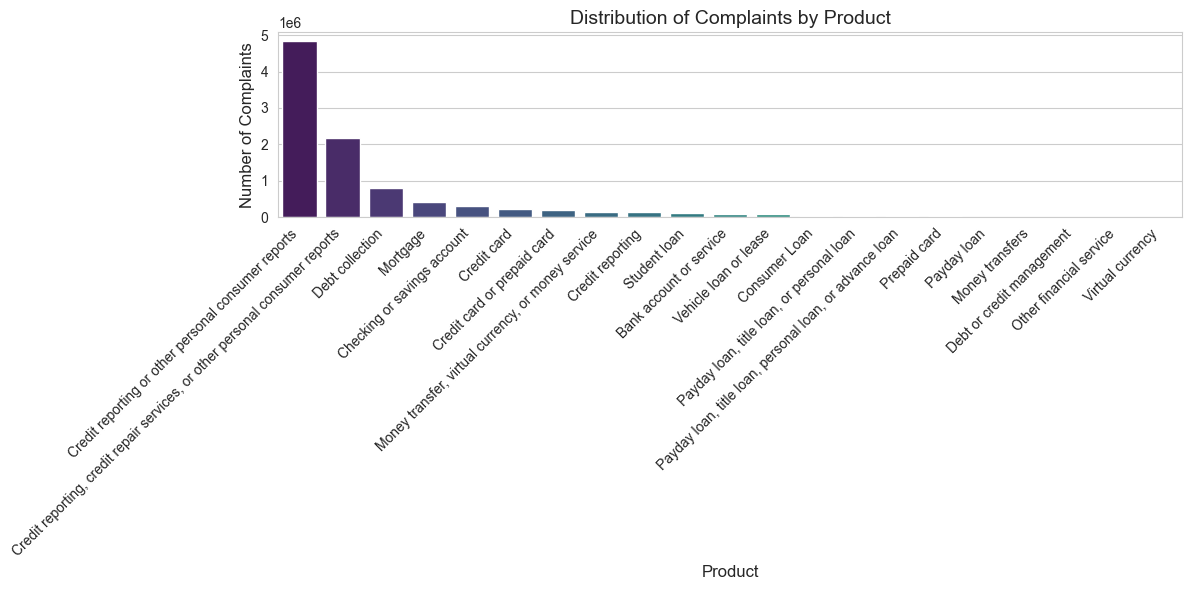

In [5]:

# Count complaints by product
product_counts = df['Product'].value_counts()

# Set up the plot size and style
plt.figure(figsize=(12, 6))  # wider figure
sns.set_style("whitegrid")

# Barplot
sns.barplot(
    x=product_counts.index, 
    y=product_counts.values, 
    palette="viridis"
)

# Improve x-axis labels
plt.title("Distribution of Complaints by Product", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate & right-align to avoid overlap
plt.tight_layout()  # Auto-adjust padding

# Show the plot
plt.show()


count   9609797.00
mean         54.47
std         149.77
min           0.00
25%           0.00
50%           0.00
75%          50.00
max        6469.00
Name: word_count, dtype: float64


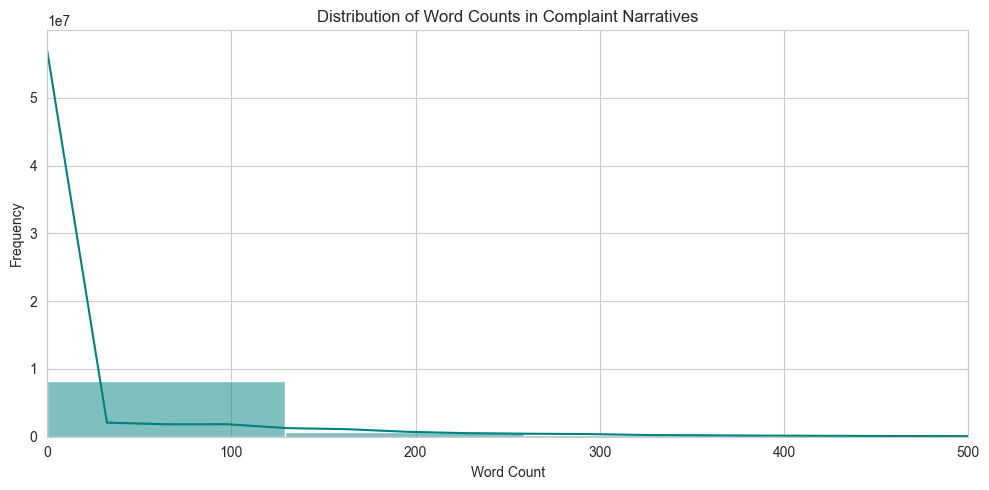

In [14]:

# Show float numbers in standard format

pd.options.display.float_format = '{:.2f}'.format
# Fill missing narratives with empty string
df['narrative'] = df['Consumer complaint narrative'].fillna("")

# Calculate word counts
#df['word_count'] = df['narrative'].apply(lambda x: len(word_tokenize(x)))
# Basic token count using whitespace
df['word_count'] = df['narrative'].apply(lambda x: len(x.split()))


# Summary statistics
print(df['word_count'].describe())

# Plot distribution of word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50, kde=True, color='teal')
plt.title("Distribution of Word Counts in Complaint Narratives")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 500)  # limit to show the most relevant range
plt.tight_layout()
plt.show()


### 📊 Word Count Statistics for Complaint Narratives

| Statistic | Meaning |
|----------|---------|
| **count** | Number of rows analyzed = **9.6 million complaints** |
| **mean** | Average word count per complaint = **54.5 words** |
| **std** | Standard deviation (variation) = **~149.8 words** |
| **min** | Minimum word count = **0** (likely blank or missing narrative) |
| **25%** | 25th percentile = **0** → at least 25% of complaints are empty |
| **50%** | 50th percentile (median) = **0** → more than half are empty! |
| **75%** | 75th percentile = **50** → 75% of entries are ≤ 50 words |
| **max** | Longest complaint = **6,469 words** (very long!) |

---

### 🎯 Interpretation

- Most complaints are **very short or empty**, indicating the need to **filter out entries with no narrative** in the next step (✅ correct approach).
- The dataset is **heavily skewed**, with a small portion of **very long complaints**.


Count Complaints With and Without Narratives


Complaints with narratives: 2980756
Complaints without narratives: 6629041


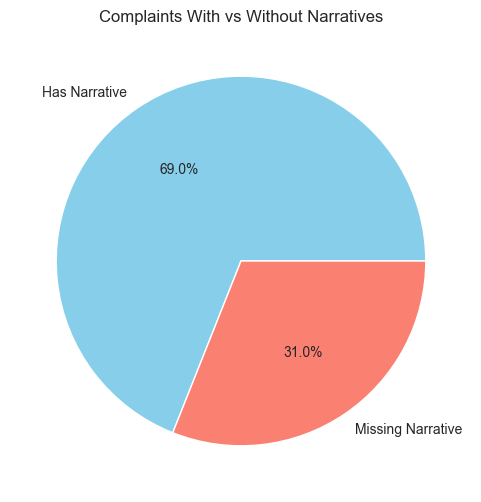

In [15]:
# Boolean flag for missing narratives
df['has_narrative'] = df['Consumer complaint narrative'].notnull()

# Count
narrative_counts = df['has_narrative'].value_counts()

# Display counts
print("\nComplaints with narratives:", narrative_counts[True])
print("Complaints without narratives:", narrative_counts[False])

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    narrative_counts, 
    labels=['Has Narrative', 'Missing Narrative'], 
    autopct='%1.1f%%', 
    colors=['skyblue', 'salmon']
)
plt.title("Complaints With vs Without Narratives")
plt.show()


In [41]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [42]:
# Show all unique values in the 'Product' column
unique_products = df['Product'].unique()

# Print them nicely
print("Unique product categories in the dataset:")
for product in unique_products:
    print("-", product)

Unique product categories in the dataset:
- Credit reporting or other personal consumer reports
- Debt collection
- Credit card
- Checking or savings account
- Money transfer, virtual currency, or money service
- Vehicle loan or lease
- Debt or credit management
- Mortgage
- Payday loan, title loan, personal loan, or advance loan
- Prepaid card
- Student loan
- Credit reporting
- Credit reporting, credit repair services, or other personal consumer reports
- Credit card or prepaid card
- Payday loan, title loan, or personal loan
- Bank account or service
- Money transfers
- Consumer Loan
- Payday loan
- Other financial service
- Virtual currency


In [31]:

# Step 3: Filter to include only the 5 specified products
#target_products = [
    #"Credit card",
    #"Personal loan",
    #"Buy Now, Pay Later",
#"Savings account",
    #"Money transfer"
#]
target_products = [
    "Credit card",
    "Credit card or prepaid card",
    "Payday loan, title loan, or personal loan",
    "Payday loan, title loan, personal loan, or advance loan",
    "Checking or savings account",
    "Money transfers",
    "Money transfer, virtual currency, or money service"
]


df_filtered = df[df['Product'].isin(target_products)].copy()

# Step 4: Remove rows with empty or null 'Consumer complaint narrative'
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].str.strip() != ""]

print("✅ After filtering:", df_filtered.shape)


✅ After filtering: (454472, 18)


In [32]:
# Step 5: Define the cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove boilerplate phrases
    text = re.sub(r"i am writing to file a complaint[.,]?", "", text)
    text = re.sub(r"thank you for your (time|attention)[.,]?", "", text)
    
    # Remove special characters (keep letters, numbers, spaces)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Collapse multiple spaces into one
    text = re.sub(r"\s+", " ", text)
    
    return text.strip()


In [43]:
# Step 6: Apply cleaning to the narrative column
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

#  Check a few examples
df_filtered[['Product', 'Consumer complaint narrative', 'cleaned_narrative']].sample(3, random_state=42)


,Product,Consumer complaint narrative,cleaned_narrative
4769267,"Payday loan, title loan, or personal loan",I made four orders on the website. One XXXX XX...,i made four orders on the website one xxxx xxx...
2428103,Credit card,It's unacceptable to see this late payment on ...,its unacceptable to see this late payment on m...
6139128,Credit card or prepaid card,Capital One sent me a letter today by mail. Th...,capital one sent me a letter today by mail the...


In [38]:
# Save final cleaned data for Task 2
df_filtered.to_csv("../data/filtered_complaints_2.csv", index=False)
print("✅ Filtered and cleaned data saved to: ../data/filtered_complaints2.csv")


✅ Filtered and cleaned data saved to: ../data/filtered_complaints2.csv


In [34]:
df_filtered.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'cleaned_narrative'],
      dtype='object')

In [35]:
df_filtered.shape

(454472, 19)